In [34]:
from matplotlib import pyplot as plt
import random

def perform_show(): #Execute the simulation of 1 Monty Hall Problem (MHP)

    winning_doors = [random.randint(0,2) for n in range(3)] #Generate the winning door, for every player, from 0 to 2
    #We have to simulate this for each palyer separately, therefore perform_show() actually runs the expriment 3 times

    players_choices = [random.randint(0, 2) for n in range(3)] #Generate the choice of each player (in their own simulations). Player 2 will be overwritten

    #Player 0: Conservative
    #Player 1: Switcher
    #Player 2: Newcomer

    opened_doors = [random.randint(0,2) for n in range(3)] #Generate the opened door, for every player (always separately)

    for i in range(3):
        while (opened_doors[i] == players_choices[i]) or (opened_doors[i] == winning_doors[i]): #Prevent the opened door to be the winning door or the one chosen by the player (the i-th player) in each simulation
            opened_doors[i] = random.randint(0,2)

    players_choices[2] = random.randint(0,2) #Newcomer (player 2) makes his choice
    while (players_choices[2] == opened_doors[2]): #But obviously he doesn't choose the opened door (of his simulation)
        players_choices[2] = random.randint(0,2)

    switcher_first_choice = players_choices[1]

    while (players_choices[1] == switcher_first_choice) or (players_choices[1] == opened_doors[1]): #Switcher (player 1) switches door, choosing the one left in his simulation
        players_choices[1] = random.randint(0,2)

    winners = [] #Boolean array where we store the winners of the simulation

    for i in range(len(players_choices)):
        if (players_choices[i] == winning_doors[i]): #If player i-th got the right door in his simulation (the i-th simulation)
            winners.append(True) #Then append True to our growing list
        else:
            winners.append(False) #Else append False

    return winners #[Bool, Bool, Bool]

In [35]:
players_win_count = [0, 0, 0] #Count of the wins of every type of player: "Conservative", "Switcher", "Newcomer"
winners = [] #This will store the outcome of every simulation [[Bool, Bool, Bool], [Bool, Bool, Bool], [Bool, Bool, Bool], ...]

simulations_number = 3419 #Number of simulations to be executed

for i in range(simulations_number):
    winners.append(perform_show()) #Store the result of every simulation
    for j in range(len(winners[i])):
        if (winners[i][j] == True): #Count the wins of every type of player
            players_win_count[j] += 1

print("Victories of every type of player: " + str(players_win_count)) #Prints the number of wins of every type of player: "Conservative", "Switcher", "Newcomer"

Victories of every type of player: [1152, 2292, 1737]


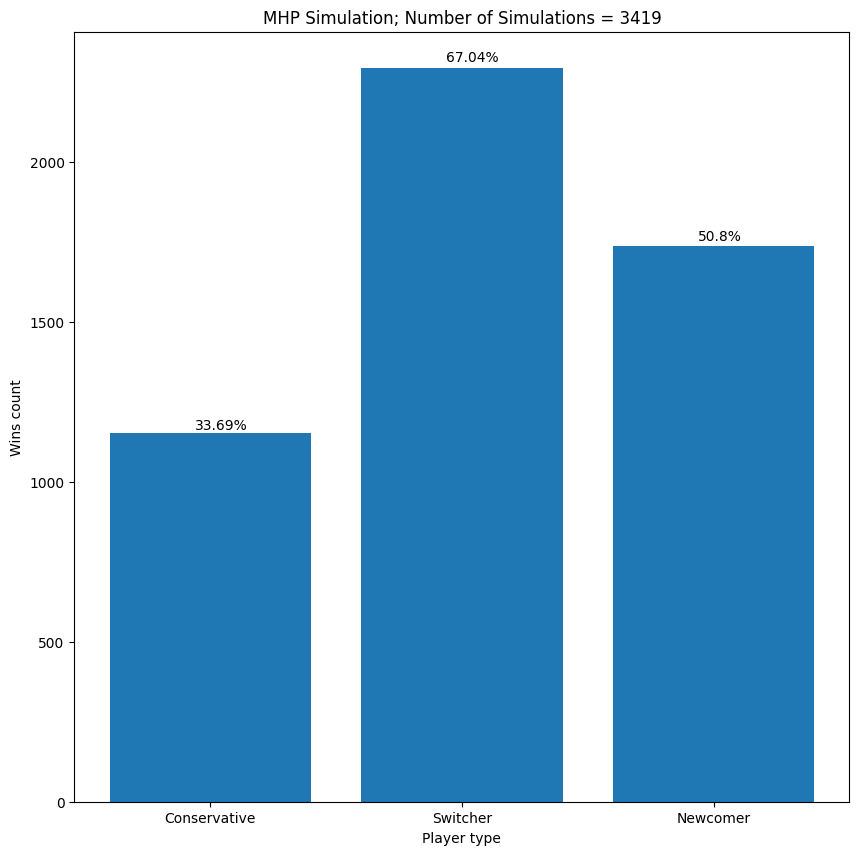

In [36]:
players_bins = ["Conservative", "Switcher", "Newcomer"]
fig, ax = plt.subplots(figsize =(10, 10))
ax.bar(players_bins, players_win_count)
ax.set_title("MHP Simulation; Number of Simulations = " + str(simulations_number))
ax.set_xlabel("Player type")
ax.set_ylabel("Wins count")
for i in ax.patches: #Adding labels for probabilities
    text = str(round((i.get_height()/simulations_number)*100, 2)) + "%"
    plt.text(i.get_x()+i.get_width()/2*(1-2/13), i.get_height()*(1+0.01), text) #Label positioning

plt.show()